# Task II - Modeling Sellers, Demand Function, and Profit

This notebook creates hypothetical sellers, implements demand and profit functions based on price, advertising, and social influence.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 1. Load Cleaned Data

In [2]:
data_path = 'cleaned_data.csv'
df = pd.read_csv(data_path)

print(f"Cleaned data shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

Cleaned data shape: (400916, 10)

Columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Total_Spending', 'Transaction_Value']

First few rows:
   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  Total_Spending  \
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom            83.4   
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  

## 2. Identify Similar Products for Hypothetical Sellers

In [3]:
def extract_product_category(description):
    if pd.isna(description):
        return 'Unknown'
    desc = str(description).upper()
    
    if 'CAKE CASE' in desc or 'CAKE' in desc:
        return 'Cake Cases'
    elif 'HEART' in desc or 'T-LIGHT' in desc or 'ORNAMENT' in desc:
        return 'Home Decor'
    elif 'PEN' in desc or 'PENCIL' in desc or 'MARKER' in desc:
        return 'Writing Supplies'
    elif 'MUG' in desc or 'CUP' in desc or 'PLATE' in desc or 'BOWL' in desc:
        return 'Tableware'
    elif 'DRAWER' in desc or 'CABINET' in desc or 'DRESSER' in desc or 'SIDEBOARD' in desc:
        return 'Furniture'
    elif 'BAG' in desc or 'PURSE' in desc:
        return 'Bags & Accessories'
    else:
        return 'Other'

df['Category'] = df['Description'].apply(extract_product_category)

print("Product Categories Distribution:")
print(df['Category'].value_counts())
print(f"\nCategory breakdown:")
for cat in df['Category'].unique():
    items = df[df['Category'] == cat]['StockCode'].nunique()
    print(f"  {cat}: {items} unique items")

Product Categories Distribution:
Category
Other                 263571
Home Decor             48599
Bags & Accessories     34090
Cake Cases             22745
Tableware              21024
Writing Supplies        6852
Furniture               4035
Name: count, dtype: int64

Category breakdown:
  Other: 3023 unique items
  Tableware: 217 unique items
  Home Decor: 337 unique items
  Cake Cases: 115 unique items
  Bags & Accessories: 199 unique items
  Furniture: 40 unique items
  Writing Supplies: 89 unique items


## 3. Select High-Volume Category and Create Hypothetical Sellers

In [4]:
selected_category = 'Cake Cases'
df_category = df[df['Category'] == selected_category].copy()

print(f"Selected category: {selected_category}")
print(f"Transactions: {len(df_category)}")
print(f"Unique items: {df_category['StockCode'].nunique()}")

price_groups = pd.cut(df_category['Price'], bins=3, labels=['Low', 'Medium', 'High'])
print(f"\nPrice distribution in {selected_category}:")
print(price_groups.value_counts())

print(f"\nTop 10 items in {selected_category}:")
top_items = df_category.groupby('StockCode').agg({
    'Description': 'first',
    'Price': 'mean',
    'Quantity': 'sum',
    'Invoice': 'count'
}).sort_values('Quantity', ascending=False).head(10)
print(top_items)

Selected category: Cake Cases
Transactions: 22745
Unique items: 115

Price distribution in Cake Cases:
Price
Low       16571
Medium     6052
High        122
Name: count, dtype: int64

Top 10 items in Cake Cases:
                                  Description      Price  Quantity  Invoice
StockCode                                                                  
21212        PACK OF 72 RETRO SPOT CAKE CASES   0.536143     57505     1553
84991             60 TEATIME FAIRY CAKE CASES   0.540539     35656     1169
21977      PACK OF 60 PINK PAISLEY CAKE CASES   0.540222     30871      946
21213             PACK OF 72 SKULL CAKE CASES   0.538486     24455      687
84992          72 SWEETHEART FAIRY CAKE CASES   0.540195     21183      719
21975          PACK OF 60 DINOSAUR CAKE CASES   0.539310     18906      623
22952         72 CAKE CASES VINTAGE CHRISTMAS   0.542290     15985      489
22417          PACK OF 60 SPACEBOY CAKE CASES   0.542600     12936      527
22423                REGENCY

## 4. Create Hypothetical Sellers Based on Price Segmentation

In [5]:
sellers_data = []

seller_1_items = df_category[df_category['Price'] <= df_category['Price'].quantile(0.33)]['StockCode'].unique()
seller_2_items = df_category[(df_category['Price'] > df_category['Price'].quantile(0.33)) & 
                               (df_category['Price'] <= df_category['Price'].quantile(0.67))]['StockCode'].unique()
seller_3_items = df_category[df_category['Price'] > df_category['Price'].quantile(0.67)]['StockCode'].unique()

sellers = {
    'Seller_A': seller_1_items,
    'Seller_B': seller_2_items,
    'Seller_C': seller_3_items
}

print("Hypothetical Sellers Distribution:")
for seller_name, items in sellers.items():
    seller_df = df_category[df_category['StockCode'].isin(items)]
    avg_price = seller_df['Price'].mean()
    total_quantity = seller_df['Quantity'].sum()
    transactions = len(seller_df)
    
    sellers_data.append({
        'Seller': seller_name,
        'Unique_Items': len(items),
        'Avg_Price': avg_price,
        'Total_Quantity': total_quantity,
        'Transactions': transactions,
        'Items': items
    })
    
    print(f"\n{seller_name}:")
    print(f"  Unique items: {len(items)}")
    print(f"  Avg price: ${avg_price:.2f}")
    print(f"  Total quantity sold: {total_quantity}")
    print(f"  Transactions: {transactions}")

sellers_df = pd.DataFrame(sellers_data)
print(f"\nSellers Summary:")
print(sellers_df[['Seller', 'Unique_Items', 'Avg_Price', 'Total_Quantity', 'Transactions']])

Hypothetical Sellers Distribution:

Seller_A:
  Unique items: 30
  Avg price: $0.53
  Total quantity sold: 280922
  Transactions: 8845

Seller_B:
  Unique items: 61
  Avg price: $2.58
  Total quantity sold: 83607
  Transactions: 7598

Seller_C:
  Unique items: 35
  Avg price: $10.21
  Total quantity sold: 38217
  Transactions: 7603

Sellers Summary:
     Seller  Unique_Items  Avg_Price  Total_Quantity  Transactions
0  Seller_A            30   0.534837          280922          8845
1  Seller_B            61   2.578043           83607          7598
2  Seller_C            35  10.211728           38217          7603


## 5. Define Seller Characteristics and Parameters

In [6]:
class Seller:
    def __init__(self, name, price, cost, advertising_budget, base_demand, items_list):
        self.name = name
        self.price = price
        self.cost = cost
        self.advertising_budget = advertising_budget
        self.base_demand = base_demand
        self.items = items_list
        self.profit = 0
        self.demand = 0
    
    def __repr__(self):
        return f"Seller(name={self.name}, price={self.price}, cost={self.cost}, ad_budget={self.advertising_budget})"

seller_a = Seller(
    name='Seller_A',
    price=sellers_df[sellers_df['Seller'] == 'Seller_A']['Avg_Price'].values[0],
    cost=2.0,
    advertising_budget=100,
    base_demand=sellers_df[sellers_df['Seller'] == 'Seller_A']['Total_Quantity'].values[0] * 0.3,
    items_list=sellers['Seller_A']
)

seller_b = Seller(
    name='Seller_B',
    price=sellers_df[sellers_df['Seller'] == 'Seller_B']['Avg_Price'].values[0],
    cost=2.5,
    advertising_budget=150,
    base_demand=sellers_df[sellers_df['Seller'] == 'Seller_B']['Total_Quantity'].values[0] * 0.3,
    items_list=sellers['Seller_B']
)

seller_c = Seller(
    name='Seller_C',
    price=sellers_df[sellers_df['Seller'] == 'Seller_C']['Avg_Price'].values[0],
    cost=3.0,
    advertising_budget=120,
    base_demand=sellers_df[sellers_df['Seller'] == 'Seller_C']['Total_Quantity'].values[0] * 0.3,
    items_list=sellers['Seller_C']
)

sellers_list = [seller_a, seller_b, seller_c]

print("Initial Seller Configuration:")
for seller in sellers_list:
    print(f"\n{seller.name}:")
    print(f"  Price: ${seller.price:.2f}")
    print(f"  Production Cost: ${seller.cost:.2f}")
    print(f"  Advertising Budget: ${seller.advertising_budget:.2f}")
    print(f"  Base Demand: {seller.base_demand:.0f} units")
    print(f"  Profit Margin per unit: ${seller.price - seller.cost:.2f}")

Initial Seller Configuration:

Seller_A:
  Price: $0.53
  Production Cost: $2.00
  Advertising Budget: $100.00
  Base Demand: 84277 units
  Profit Margin per unit: $-1.47

Seller_B:
  Price: $2.58
  Production Cost: $2.50
  Advertising Budget: $150.00
  Base Demand: 25082 units
  Profit Margin per unit: $0.08

Seller_C:
  Price: $10.21
  Production Cost: $3.00
  Advertising Budget: $120.00
  Base Demand: 11465 units
  Profit Margin per unit: $7.21


## 6. Implement Demand Function

In [7]:
def calculate_demand(seller_i, seller_j, alpha, beta, gamma, influence_score):
    D_i = (seller_i.base_demand + 
           alpha * seller_i.advertising_budget + 
           beta * (seller_i.price - seller_j.price) + 
           gamma * influence_score)
    
    return max(D_i, 0)

alpha = 0.05
beta = 15.0
gamma = 0.8
initial_influence = 100

print("Demand Function Parameters:")
print(f"  α (advertising impact): {alpha}")
print(f"  β (price sensitivity): {beta}")
print(f"  γ (social influence impact): {gamma}")
print(f"  Initial social influence score: {initial_influence}")

print("\n" + "="*60)
print("DEMAND CALCULATIONS (Initial State)")
print("="*60)

demands = {}
for i, seller_i in enumerate(sellers_list):
    for j, seller_j in enumerate(sellers_list):
        if i != j:
            D = calculate_demand(seller_i, seller_j, alpha, beta, gamma, initial_influence)
            demands[f"{seller_i.name}_vs_{seller_j.name}"] = D
            
print("\nDemand for each seller (considering each competitor):")
for seller_i in sellers_list:
    print(f"\n{seller_i.name}:")
    for seller_j in sellers_list:
        if seller_i.name != seller_j.name:
            demand_val = demands[f"{seller_i.name}_vs_{seller_j.name}"]
            print(f"  vs {seller_j.name}: {demand_val:.2f} units")

Demand Function Parameters:
  α (advertising impact): 0.05
  β (price sensitivity): 15.0
  γ (social influence impact): 0.8
  Initial social influence score: 100

DEMAND CALCULATIONS (Initial State)

Demand for each seller (considering each competitor):

Seller_A:
  vs Seller_B: 84330.95 units
  vs Seller_C: 84216.45 units

Seller_B:
  vs Seller_A: 25200.25 units
  vs Seller_C: 25055.09 units

Seller_C:
  vs Seller_A: 11696.25 units
  vs Seller_B: 11665.61 units


## 7. Implement Profit Function

In [8]:
def calculate_profit(seller_i, seller_j, alpha, beta, gamma, influence_score):
    D_i = calculate_demand(seller_i, seller_j, alpha, beta, gamma, influence_score)
    seller_i.demand = D_i
    profit = (seller_i.price - seller_i.cost) * D_i - seller_i.advertising_budget
    seller_i.profit = profit
    return profit, D_i

print("Profit Calculations (Initial State):")
print("="*70)

profit_data = []

for i, seller_i in enumerate(sellers_list):
    for j, seller_j in enumerate(sellers_list):
        if i != j:
            profit, demand = calculate_profit(seller_i, seller_j, alpha, beta, gamma, initial_influence)
            
            profit_data.append({
                'Seller': seller_i.name,
                'Competitor': seller_j.name,
                'Price': seller_i.price,
                'Cost': seller_i.cost,
                'Margin': seller_i.price - seller_i.cost,
                'Demand': demand,
                'Ad_Budget': seller_i.advertising_budget,
                'Revenue': (seller_i.price - seller_i.cost) * demand,
                'Profit': profit
            })

profit_df = pd.DataFrame(profit_data)

for seller in sellers_list:
    seller_profits = profit_df[profit_df['Seller'] == seller.name]
    print(f"\n{seller.name}:")
    print(f"  Price: ${seller.price:.2f}")
    print(f"  Cost: ${seller.cost:.2f}")
    print(f"  Advertising Budget: ${seller.advertising_budget:.2f}")
    print(f"  Margin per unit: ${seller.price - seller.cost:.2f}")
    for idx, row in seller_profits.iterrows():
        print(f"  vs {row['Competitor']}:")
        print(f"    Demand: {row['Demand']:.2f} units")
        print(f"    Revenue: ${row['Revenue']:.2f}")
        print(f"    Profit: ${row['Profit']:.2f}")

print("\n" + "="*70)

Profit Calculations (Initial State):

Seller_A:
  Price: $0.53
  Cost: $2.00
  Advertising Budget: $100.00
  Margin per unit: $-1.47
  vs Seller_B:
    Demand: 84330.95 units
    Revenue: $-123558.62
    Profit: $-123658.62
  vs Seller_C:
    Demand: 84216.45 units
    Revenue: $-123390.85
    Profit: $-123490.85

Seller_B:
  Price: $2.58
  Cost: $2.50
  Advertising Budget: $150.00
  Margin per unit: $0.08
  vs Seller_A:
    Demand: 25200.25 units
    Revenue: $1966.70
    Profit: $1816.70
  vs Seller_C:
    Demand: 25055.09 units
    Revenue: $1955.37
    Profit: $1805.37

Seller_C:
  Price: $10.21
  Cost: $3.00
  Advertising Budget: $120.00
  Margin per unit: $7.21
  vs Seller_A:
    Demand: 11696.25 units
    Revenue: $84350.20
    Profit: $84230.20
  vs Seller_B:
    Demand: 11665.61 units
    Revenue: $84129.18
    Profit: $84009.18



## 8. Profit Analysis Summary

In [9]:
print("Summary Statistics:")
print(f"\nTotal Demand across all scenarios: {profit_df['Demand'].sum():.2f} units")
print(f"Total Revenue (before ad costs): {profit_df['Revenue'].sum():.2f}")
print(f"Total Advertising Spend: {profit_df['Ad_Budget'].sum():.2f}")
print(f"Total Profit: {profit_df['Profit'].sum():.2f}")

print(f"\nAverage Profit per Seller Scenario: {profit_df['Profit'].mean():.2f}")
print(f"Best Profit Scenario: {profit_df['Profit'].max():.2f}")
print(f"Worst Profit Scenario: {profit_df['Profit'].min():.2f}")

print(f"\nProfit by Seller:")
for seller in sellers_list:
    seller_profits = profit_df[profit_df['Seller'] == seller.name]['Profit']
    avg_profit = seller_profits.mean()
    print(f"  {seller.name}: ${avg_profit:.2f} (avg across competitors)")

Summary Statistics:

Total Demand across all scenarios: 242164.60 units
Total Revenue (before ad costs): -74548.02
Total Advertising Spend: 740.00
Total Profit: -75288.02

Average Profit per Seller Scenario: -12548.00
Best Profit Scenario: 84230.20
Worst Profit Scenario: -123658.62

Profit by Seller:
  Seller_A: $-123574.74 (avg across competitors)
  Seller_B: $1811.04 (avg across competitors)
  Seller_C: $84119.69 (avg across competitors)


## 9. Sensitivity Analysis - Impact of Parameters

In [10]:
print("Sensitivity Analysis: Impact of Advertising Budget")
print("="*70)

for multiplier in [0.5, 1.0, 1.5, 2.0]:
    print(f"\nAdvertising Budget Multiplier: {multiplier}x")
    total_profit = 0
    for i, seller_i in enumerate(sellers_list):
        temp_seller = Seller(
            name=seller_i.name,
            price=seller_i.price,
            cost=seller_i.cost,
            advertising_budget=seller_i.advertising_budget * multiplier,
            base_demand=seller_i.base_demand,
            items_list=seller_i.items
        )
        
        for j, seller_j in enumerate(sellers_list):
            if i != j:
                profit, demand = calculate_profit(temp_seller, seller_j, alpha, beta, gamma, initial_influence)
                total_profit += profit
    
    print(f"  Total Profit: ${total_profit:.2f}")

print("\n" + "="*70)
print("Sensitivity Analysis: Impact of Price Changes")
print("="*70)

for price_change in [-0.5, -0.25, 0, 0.25, 0.5]:
    print(f"\nPrice Change: {price_change:+.2f}")
    total_profit = 0
    for i, seller_i in enumerate(sellers_list):
        temp_seller = Seller(
            name=seller_i.name,
            price=seller_i.price + price_change,
            cost=seller_i.cost,
            advertising_budget=seller_i.advertising_budget,
            base_demand=seller_i.base_demand,
            items_list=seller_i.items
        )
        
        for j, seller_j in enumerate(sellers_list):
            if i != j:
                profit, demand = calculate_profit(temp_seller, seller_j, alpha, beta, gamma, initial_influence)
                total_profit += profit
    
    print(f"  Total Profit: ${total_profit:.2f}")

Sensitivity Analysis: Impact of Advertising Budget

Advertising Budget Multiplier: 0.5x
  Total Profit: $-74954.55

Advertising Budget Multiplier: 1.0x
  Total Profit: $-75288.02

Advertising Budget Multiplier: 1.5x
  Total Profit: $-75621.50

Advertising Budget Multiplier: 2.0x
  Total Profit: $-75954.97

Sensitivity Analysis: Impact of Price Changes

Price Change: -0.50
  Total Profit: $-196435.19

Price Change: -0.25
  Total Profit: $-135867.23

Price Change: +0.00
  Total Profit: $-75288.02

Price Change: +0.25
  Total Profit: $-14697.57

Price Change: +0.50
  Total Profit: $45904.14


## 10. Visualization of Profit Landscape

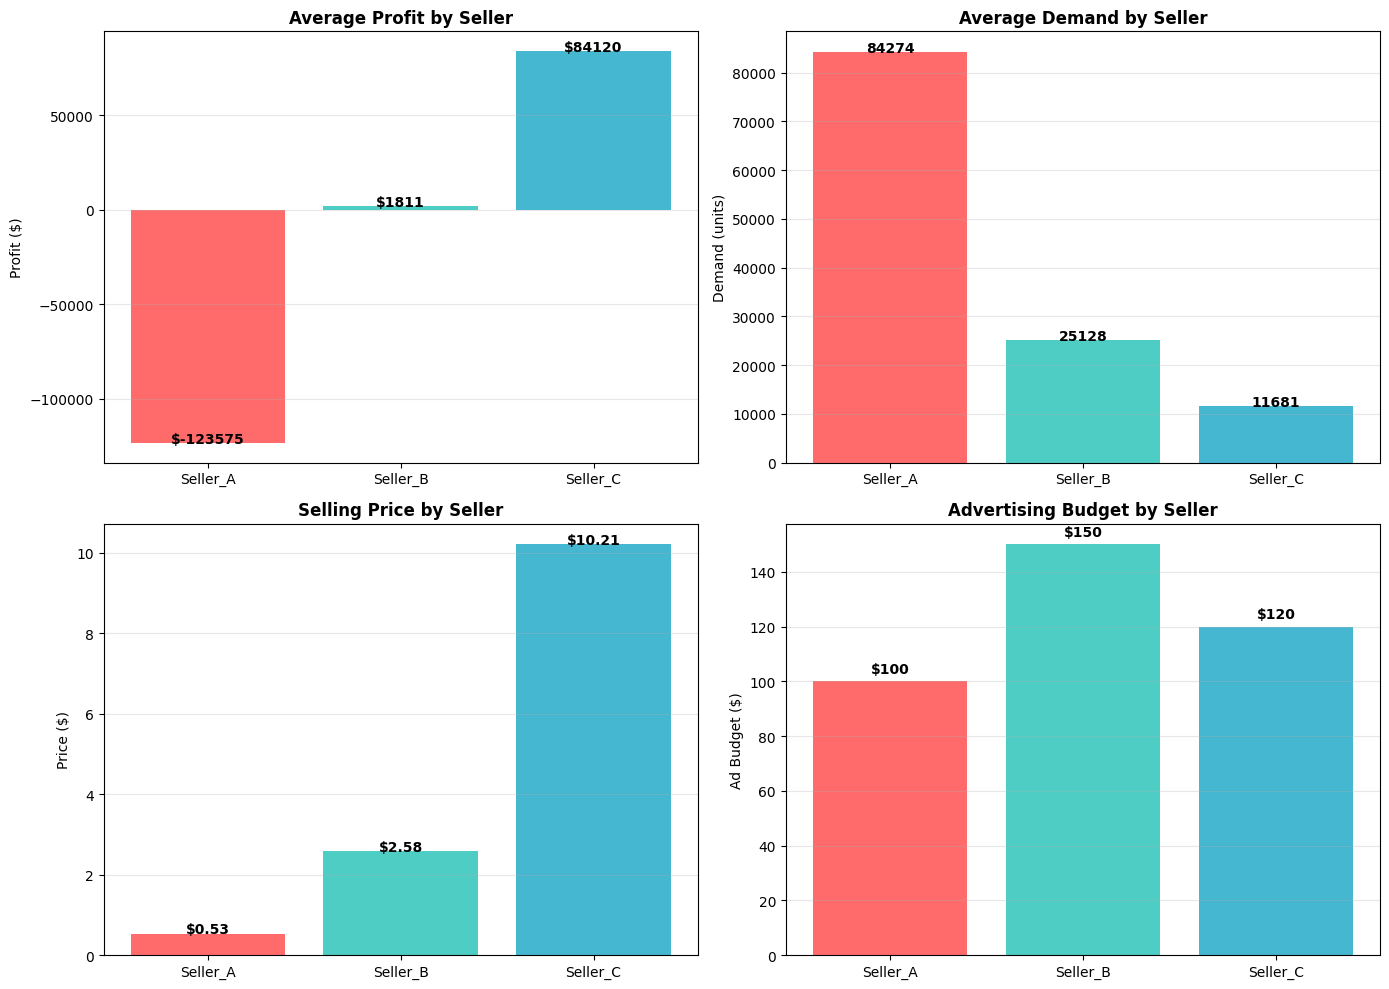

Chart saved as 'task_II_sellers_comparison.png'


In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax = axes[0, 0]
seller_names = [s.name for s in sellers_list]
profits = []
for seller in sellers_list:
    seller_p = profit_df[profit_df['Seller'] == seller.name]['Profit'].mean()
    profits.append(seller_p)

ax.bar(seller_names, profits, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax.set_title('Average Profit by Seller', fontsize=12, fontweight='bold')
ax.set_ylabel('Profit ($)')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(profits):
    ax.text(i, v + 50, f'${v:.0f}', ha='center', fontweight='bold')

ax = axes[0, 1]
demands = profit_df.groupby('Seller')['Demand'].mean()
ax.bar(seller_names, demands, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax.set_title('Average Demand by Seller', fontsize=12, fontweight='bold')
ax.set_ylabel('Demand (units)')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(demands):
    ax.text(i, v + 5, f'{v:.0f}', ha='center', fontweight='bold')

ax = axes[1, 0]
prices = [s.price for s in sellers_list]
ax.bar(seller_names, prices, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax.set_title('Selling Price by Seller', fontsize=12, fontweight='bold')
ax.set_ylabel('Price ($)')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(prices):
    ax.text(i, v + 0.02, f'${v:.2f}', ha='center', fontweight='bold')

ax = axes[1, 1]
ad_budgets = [s.advertising_budget for s in sellers_list]
ax.bar(seller_names, ad_budgets, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax.set_title('Advertising Budget by Seller', fontsize=12, fontweight='bold')
ax.set_ylabel('Ad Budget ($)')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(ad_budgets):
    ax.text(i, v + 3, f'${v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('task_II_sellers_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print("Chart saved as 'task_II_sellers_comparison.png'")

## 11. Save Seller Configuration

In [12]:
seller_config = []
for seller in sellers_list:
    seller_config.append({
        'Seller_Name': seller.name,
        'Price': seller.price,
        'Cost': seller.cost,
        'Advertising_Budget': seller.advertising_budget,
        'Base_Demand': seller.base_demand,
        'Profit_Margin': seller.price - seller.cost,
        'Num_Items': len(seller.items)
    })

config_df = pd.DataFrame(seller_config)
config_df.to_csv('seller_config.csv', index=False)
print("Seller configuration saved to 'seller_config.csv'")
print(f"\nConfiguration Summary:")
print(config_df.to_string(index=False))

profit_df.to_csv('initial_profit_calculations.csv', index=False)
print("\nProfit calculations saved to 'initial_profit_calculations.csv'")

Seller configuration saved to 'seller_config.csv'

Configuration Summary:
Seller_Name     Price  Cost  Advertising_Budget  Base_Demand  Profit_Margin  Num_Items
   Seller_A  0.534837   2.0                 100      84276.6      -1.465163         30
   Seller_B  2.578043   2.5                 150      25082.1       0.078043         61
   Seller_C 10.211728   3.0                 120      11465.1       7.211728         35

Profit calculations saved to 'initial_profit_calculations.csv'
